## 분산투자



분산투자 개념은 한번 쯤은 들어보았을 것입니다.  
가장 큰 수익을 올릴 수 있는 종목을 알아낼 수 있으면 좋겠지만, 주가를 예측하는 것은 불가능하기 때문에  
그것에 대한 대안으로 다양한 주식에 투자하는 것이 바로 분산투자입니다.  
분산 투자하면 다수 종목의 평균적인 수익과 손실을 추구할 수 있게 됩니다.

In [1]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 데이터 가져오기

samsung = fdr.DataReader("005930", "2017")
kakao = fdr.DataReader("035720", "2017")
sk = fdr.DataReader("000660", "2017")
naver = fdr.DataReader("035420", "2017")
hyundai = fdr.DataReader("005380", "2017")
print(samsung.head())
print(kakao.head())
print(sk.head())
print(naver.head())
print(hyundai.head())

             Open   High    Low  Close  Volume    Change
Date                                                    
2017-01-02  35980  36240  35880  36100   93012  0.001665
2017-01-03  36280  36620  36020  36480  147153  0.010526
2017-01-04  36500  36520  36100  36160  159435 -0.008772
2017-01-05  36060  36060  35540  35560  219349 -0.016593
2017-01-06  36180  36440  36040  36200  177619  0.017998
             Open   High    Low  Close   Volume    Change
Date                                                     
2017-01-02  15534  15574  15373  15394   143140 -0.003947
2017-01-03  15495  16057  15454  16057   445180  0.043069
2017-01-04  16137  17080  16117  16920  1224395  0.053746
2017-01-05  17060  17261  16860  16860   611713 -0.003546
2017-01-06  16940  16960  16498  16800   410880 -0.003559
             Open   High    Low  Close   Volume    Change
Date                                                     
2017-01-02  44750  46000  44600  45800  1547681  0.024609
2017-01-03  46200  47

In [3]:
# 결측치 검사, 데이터에 결측치는 없다. 바로 사용해도 무방할듯
print(pd.isnull(samsung).sum())
print(pd.isnull(kakao).sum())
print(pd.isnull(sk).sum())
print(pd.isnull(naver).sum())
print(pd.isnull(hyundai).sum())


Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64


**삼성전자 단일 종목 투자성과**

In [4]:
# 삼성전자 단일 종목 수익률
samsungDayReturn = (samsung['Close'] / samsung['Close'].shift(1)).fillna(1)
samsungDayReturn

Date
2017-01-02    1.000000
2017-01-03    1.010526
2017-01-04    0.991228
2017-01-05    0.983407
2017-01-06    1.017998
                ...   
2022-06-10    0.978528
2022-06-13    0.973354
2022-06-14    0.996779
2022-06-15    0.980614
2022-06-16    1.003295
Name: Close, Length: 1340, dtype: float64

In [5]:
# 삼전 누적수익률
samsungCumulativeReturn = samsungDayReturn.cumprod()
samsungCumulativeReturn

Date
2017-01-02    1.000000
2017-01-03    1.010526
2017-01-04    1.001662
2017-01-05    0.985042
2017-01-06    1.002770
                ...   
2022-06-10    1.767313
2022-06-13    1.720222
2022-06-14    1.714681
2022-06-15    1.681440
2022-06-16    1.686981
Name: Close, Length: 1340, dtype: float64

In [6]:
# 누적수익률을 구하는 다른 방법
samsungCumulativeReturn = samsung['Close'] / samsung['Close'].iloc[0]
samsungCumulativeReturn

Date
2017-01-02    1.000000
2017-01-03    1.010526
2017-01-04    1.001662
2017-01-05    0.985042
2017-01-06    1.002770
                ...   
2022-06-10    1.767313
2022-06-13    1.720222
2022-06-14    1.714681
2022-06-15    1.681440
2022-06-16    1.686981
Name: Close, Length: 1340, dtype: float64

In [7]:
# cagr
samsungCagr = samsungCumulativeReturn.iloc[-1] ** (252/len(samsung))
# mdd
samsungDd = (samsungCumulativeReturn.cummax() - samsungCumulativeReturn) / samsungCumulativeReturn.cummax() * 100
samsungMdd = samsungDd.max()

print("cagr: ",samsungCagr)
print("mdd: ",samsungMdd)

cagr:  1.1033422678969327
mdd:  34.55085634393569


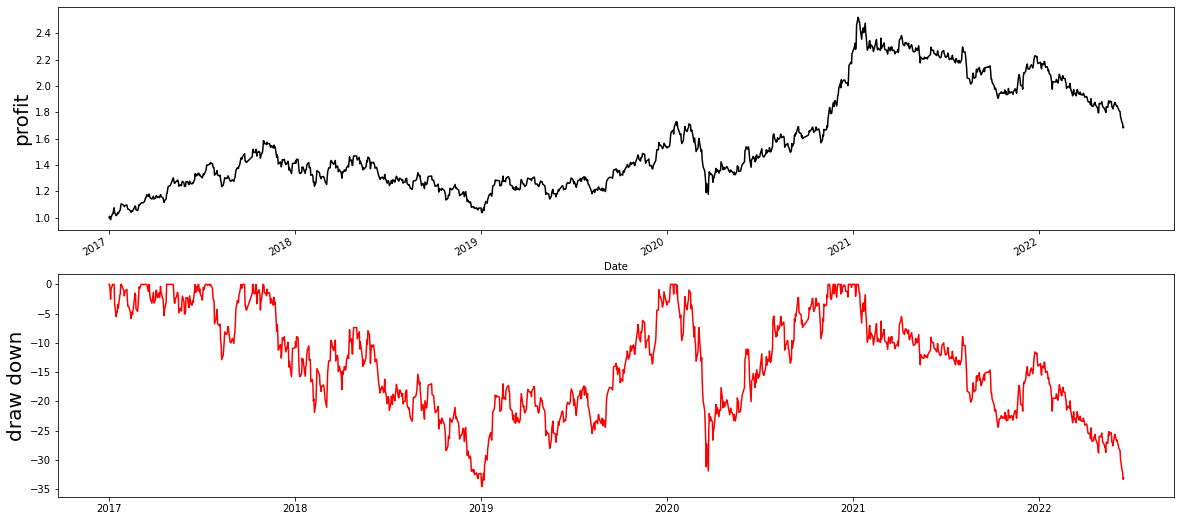

In [37]:
# 시각화
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
samsungCumulativeReturn.plot(color="black")
plt.ylabel("profit", fontsize=20)
plt.subplot(2, 1, 2)
plt.plot(-samsungDd, color="red")
plt.ylabel("draw down", fontsize=20)
plt.show()

**5개 종목 분산 투자 성과와 누적 수익률 곡선**

삼성전자 단일 종목에 2020년부터 투자한 결과 CAGR은 7%, MDD는 32%  
분산투자하면 어떻게 변화하는지 살펴보겠습니다.

In [9]:
stocks = [samsung, kakao, sk, naver, hyundai]
data = pd.DataFrame()

for stock in stocks:
    data = pd.concat([data, stock['Close']], axis=1)
    
data.columns = ["samsung", "kakao", "sk", "naver", "hyundai"]

data

,samsung,kakao,sk,naver,hyundai
2017-01-02,36100,15394,45800,155620,150000
2017-01-03,36480,16057,47250,153617,153000
2017-01-04,36160,16920,46500,162230,154000
2017-01-05,35560,16860,46950,158424,153500
2017-01-06,36200,16800,48000,160026,151000
...,...,...,...,...,...
2022-06-10,63800,80100,103500,270000,184500
2022-06-13,62100,76500,99000,254000,175000
2022-06-14,61900,76600,99100,253000,171500
2022-06-15,60700,72700,97900,244500,174000


#### 다중 종목의 수익률을 계산하는 원리

https://sprinkle-guide-797.notion.site/4f7f60695edc4cebbfe568d442d0627a

## 누적수익률 계산

In [10]:
# 개별 자산 일별 수익률
dayReturn = (data / data.shift(1)).fillna(1)
dayReturn

,samsung,kakao,sk,naver,hyundai
2017-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-03,1.010526,1.043069,1.031659,0.987129,1.020000
2017-01-04,0.991228,1.053746,0.984127,1.056068,1.006536
2017-01-05,0.983407,0.996454,1.009677,0.976539,0.996753
2017-01-06,1.017998,0.996441,1.022364,1.010112,0.983713
...,...,...,...,...,...
2022-06-10,0.978528,0.985240,0.981043,0.989011,1.010959
2022-06-13,0.973354,0.955056,0.956522,0.940741,0.948509
2022-06-14,0.996779,1.001307,1.001010,0.996063,0.980000
2022-06-15,0.980614,0.949086,0.987891,0.966403,1.014577


In [11]:
# 개별 자산 누적 수익률
cumReturn = data / data.iloc[0]
cumReturn

,samsung,kakao,sk,naver,hyundai
2017-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-03,1.010526,1.043069,1.031659,0.987129,1.020000
2017-01-04,1.001662,1.099130,1.015284,1.042475,1.026667
2017-01-05,0.985042,1.095232,1.025109,1.018018,1.023333
2017-01-06,1.002770,1.091334,1.048035,1.028313,1.006667
...,...,...,...,...,...
2022-06-10,1.767313,5.203326,2.259825,1.734996,1.230000
2022-06-13,1.720222,4.969469,2.161572,1.632181,1.166667
2022-06-14,1.714681,4.975965,2.163755,1.625755,1.143333
2022-06-15,1.681440,4.722619,2.137555,1.571135,1.160000


In [12]:
# 포트폴리오 비율 : 동일 가중
portWeight = [1/len(data.columns)] * len(data.columns)
portWeight

[0.2, 0.2, 0.2, 0.2, 0.2]

In [13]:
# 누적 수익률
portCumReturn = (portWeight * cumReturn).sum(axis=1)
portCumReturn

2017-01-02    1.000000
2017-01-03    1.018477
2017-01-04    1.037043
2017-01-05    1.029347
2017-01-06    1.035424
                ...   
2022-06-10    2.439092
2022-06-13    2.330022
2022-06-14    2.324698
2022-06-15    2.254550
2022-06-16    2.241161
Length: 1340, dtype: float64

## 일간 수익률

### 간단한 방법 -> 역연산

In [14]:
portDayReturn = (portCumReturn / portCumReturn.shift(1)).fillna(1)
portDayReturn

2017-01-02    1.000000
2017-01-03    1.018477
2017-01-04    1.018230
2017-01-05    0.992578
2017-01-06    1.005904
                ...   
2022-06-10    0.986544
2022-06-13    0.955283
2022-06-14    0.997715
2022-06-15    0.969825
2022-06-16    0.994061
Length: 1340, dtype: float64

### 안 간단한 방법 -> 비율 계산

In [15]:
# 자산별 비중이 반영된 자산 흐름
weightedCumReturn = portWeight * cumReturn
weightedCumReturn

,samsung,kakao,sk,naver,hyundai
2017-01-02,0.200000,0.200000,0.200000,0.200000,0.200000
2017-01-03,0.202105,0.208614,0.206332,0.197426,0.204000
2017-01-04,0.200332,0.219826,0.203057,0.208495,0.205333
2017-01-05,0.197008,0.219046,0.205022,0.203604,0.204667
2017-01-06,0.200554,0.218267,0.209607,0.205663,0.201333
...,...,...,...,...,...
2022-06-10,0.353463,1.040665,0.451965,0.346999,0.246000
2022-06-13,0.344044,0.993894,0.432314,0.326436,0.233333
2022-06-14,0.342936,0.995193,0.432751,0.325151,0.228667
2022-06-15,0.336288,0.944524,0.427511,0.314227,0.232000


In [16]:
# 자산 비율 => 자산 흐름 정규화 
assetRatio = weightedCumReturn.divide(weightedCumReturn.sum(axis=1), axis=0)
assetRatio

,samsung,kakao,sk,naver,hyundai
2017-01-02,0.200000,0.200000,0.200000,0.200000,0.200000
2017-01-03,0.198439,0.204829,0.202589,0.193844,0.200299
2017-01-04,0.193176,0.211974,0.195804,0.201048,0.197999
2017-01-05,0.191392,0.212801,0.199177,0.197799,0.198832
2017-01-06,0.193693,0.210800,0.202436,0.198626,0.194445
...,...,...,...,...,...
2022-06-10,0.144916,0.426661,0.185301,0.142266,0.100857
2022-06-13,0.147657,0.426560,0.185541,0.140100,0.100142
2022-06-14,0.147519,0.428096,0.186154,0.139868,0.098364
2022-06-15,0.149160,0.418941,0.189621,0.139375,0.102903


In [17]:
# 포트폴리오 개별자산 순 수익률
assetRatio * dayReturn.shift(-1)

,samsung,kakao,sk,naver,hyundai
2017-01-02,0.202105,0.208614,0.206332,0.197426,0.204000
2017-01-03,0.196698,0.215838,0.199373,0.204713,0.201608
2017-01-04,0.189971,0.211222,0.197698,0.196331,0.197356
2017-01-05,0.194836,0.212044,0.203631,0.199799,0.195593
2017-01-06,0.199150,0.208528,0.208973,0.193655,0.193801
...,...,...,...,...,...
2022-06-10,0.141054,0.407485,0.177244,0.133835,0.095664
2022-06-13,0.147182,0.427117,0.185728,0.139548,0.098139
2022-06-14,0.144659,0.406300,0.183900,0.135169,0.099798
2022-06-15,0.149651,0.416636,0.188653,0.136809,0.102312


In [18]:
# 포트폴리오 일간 수익률
portDayReturn2 = (assetRatio * dayReturn.shift(-1)).sum(axis=1).shift(1).fillna(1)
portDayReturn2

2017-01-02    1.000000
2017-01-03    1.018477
2017-01-04    1.018230
2017-01-05    0.992578
2017-01-06    1.005904
                ...   
2022-06-10    0.986544
2022-06-13    0.955283
2022-06-14    0.997715
2022-06-15    0.969825
2022-06-16    0.994061
Length: 1340, dtype: float64

In [19]:
# 포트폴리오 누적 수익률
portCumReturn2 = portDayReturn.cumprod()
portCumReturn2

2017-01-02    1.000000
2017-01-03    1.018477
2017-01-04    1.037043
2017-01-05    1.029347
2017-01-06    1.035424
                ...   
2022-06-10    2.439092
2022-06-13    2.330022
2022-06-14    2.324698
2022-06-15    2.254550
2022-06-16    2.241161
Length: 1340, dtype: float64

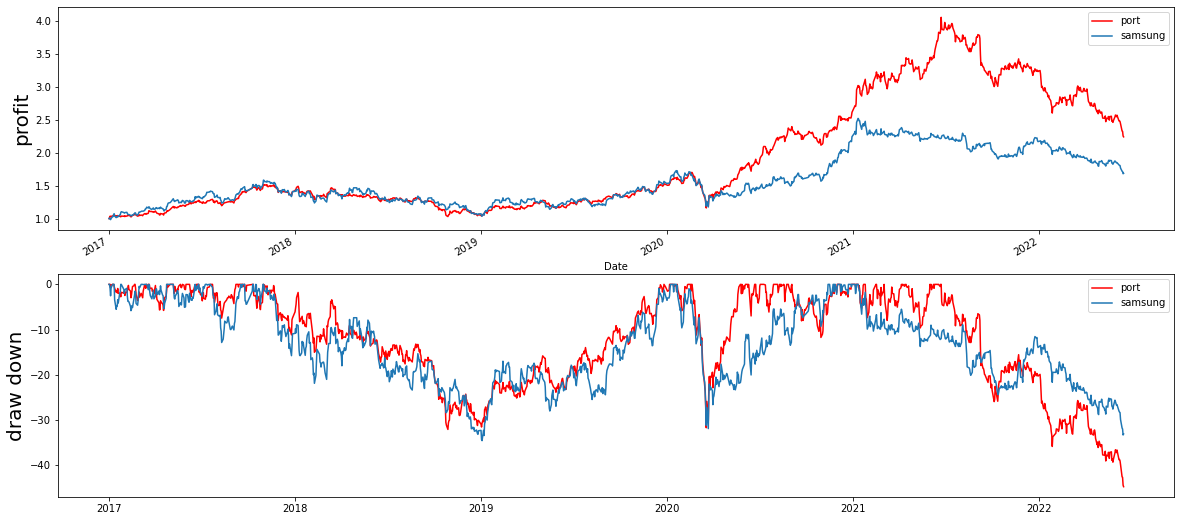

In [39]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
portCumReturn.plot(color="red", label="port")
samsungCumulativeReturn.plot(label="samsung")
plt.ylabel("profit", fontsize=20)
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(-dd, color="red", label="port")
plt.plot(-samsungDd, label="samsung")
plt.ylabel("draw down", fontsize=20)
plt.legend()
plt.show()

**포트폴리오와 개별 종목 비교**

In [20]:
# 개별 자산 누적수익률
cumReturn

,samsung,kakao,sk,naver,hyundai
2017-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2017-01-03,1.010526,1.043069,1.031659,0.987129,1.020000
2017-01-04,1.001662,1.099130,1.015284,1.042475,1.026667
2017-01-05,0.985042,1.095232,1.025109,1.018018,1.023333
2017-01-06,1.002770,1.091334,1.048035,1.028313,1.006667
...,...,...,...,...,...
2022-06-10,1.767313,5.203326,2.259825,1.734996,1.230000
2022-06-13,1.720222,4.969469,2.161572,1.632181,1.166667
2022-06-14,1.714681,4.975965,2.163755,1.625755,1.143333
2022-06-15,1.681440,4.722619,2.137555,1.571135,1.160000


samsung
cagr: 1.1033422678969327
mdd: 34.55085634393569
kakao
cagr: 1.3376300845979152
mdd: 57.345132743362825
sk
cagr: 1.152460204716144
mdd: 39.45435466946485
naver
cagr: 1.0848823626525264
mdd: 47.136563876651984
hyundai
cagr: 1.0271910092823218
mdd: 61.23529411764706
portfolio
cagr: 1.163884425490506
mdd: 44.73115163344883


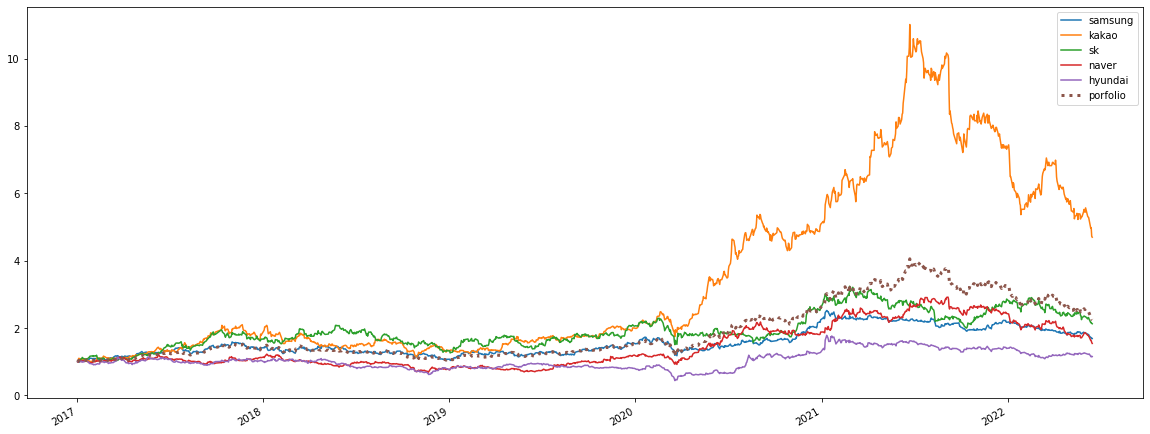

In [21]:
plt.figure(figsize=(20, 8))

for stock in cumReturn.columns:
    # 그래프
    cumReturn[stock].plot(label=stock)
    # cagr
    cagr = cumReturn[stock].iloc[-1] ** (252/len(cumReturn[stock]))
    # mdd
    dd = (cumReturn[stock].cummax() - cumReturn[stock]) / cumReturn[stock].cummax() * 100
    mdd= dd.max()
    
    print(stock)
    print(f"cagr: {cagr}\nmdd: {mdd}")
    print("=======")
    
    

# cagr
cagr = portCumReturn.iloc[-1] ** (252/len(portCumReturn))
# mdd
dd = (portCumReturn.cummax() - portCumReturn) / portCumReturn.cummax() * 100
mdd= dd.max()

print("portfolio")
print(f"cagr: {cagr}\nmdd: {mdd}")
print("=======")

portCumReturn.plot(label = "porfolio", linestyle="dotted", linewidth=3)
plt.legend()
plt.show()

### 다중종목 수익률 계산법 함수화

In [22]:
def getCloseData(ticker, start, end=None):
    """
    종가 데이터
    ticker: 종목 번호
    start: 시작일
    end: 마지막 날짜
    return: 종목의 종가 데이터
    """
    return fdr.DataReader(ticker, start, end)['Close']

a=getCloseData("069500", "2015")

In [23]:
def getDayReturn(closeDataSet):
    """
    개별종목 일별 수익률
    closeDataSet: 종가 데이터
    return: 종가 데이터의 일별 수익률
    """
    return (closeDataSet / closeDataSet.shift(1)).fillna(1)

getDayReturn(c)

NameError: name 'c' is not defined

In [ ]:
def getCumulativeReturn(closeDataSet=None):
    """
    개별종목 누적수익률 == 자산흐름
    closeDataSet: 종가 데이터
    return:종가데이터 누적수익률
    """
    return closeDataSet / closeDataSet.iloc[0]
    
getCumulativeReturn(c)

In [ ]:
def getPortfolioResult(closeDataSet, weight=None):
    """
    포트폴리오 결과
    closeDataSet: 종가 데이터
    weight: 포트폴리오 개별자산 비중
    return: 포트폴리오 일간수익률, 누적수익률
    """
    # 개별종목 일별 수익률
    dayReturn = getDayReturn(closeDataSet)
    # 개별종목 누적 수익률
    cumulativeReturn = getCumulativeReturn(closeDataSet)
    # 자산별 비중. 기본값: 동일비중
    if not weight:
        weight = [1/len(closeDataSet.columns)] * len(closeDataSet.columns)
        
    # 포트폴리오 누적 수익률
    portfolioCumulativeReturn = (weight * cumulativeReturn).sum(axis=1)
    # 포트폴리오 일별 수익률
    portfolioDayReturn = (portfolioCumulativeReturn / portfolioCumulativeReturn.shift(1)).fillna(1)
        
#     # 자산별 비중이 반영된 개별자산 누적 수익률
#     weightedCumulativeReturn = weight * cumulativeReturn
#     # 자산흐름 정규화: 시기별 각 자산 보유 비율
#     normalizedAssetFlow = weightedCumulativeReturn.divide(weightedCumulativeReturn.sum(axis=1), axis=0) # 각 행의 합으로 각 행을 나누기
#     # 자산별 비중이 반영된 개별자산 일별 수익률
#     weightedDayReturn = normalizedAssetFlow * dayReturn.shift(-1).fillna(0)
#     # 포트폴리오 일별 수익률 = 자산별 비중이 반영된 개별자산 일별 수익률의 합
#     portfolioDayReturn = weightedDayReturn.sum(axis=1).shift(1).fillna(1)
#     # 포트폴리오 누적 수익률
#     portfolioCumulativeReturn = portfolioDayReturn.cumprod()
# #     portfolioCumulativeReturn = weightedCumulativeReturn.sum(axis=1)
    
    return portfolioDayReturn, portfolioCumulativeReturn

portfolioDayReturn, portfolioCumulativeReturn =getPortfolioResult(c)
print(portfolioDayReturn, portfolioCumulativeReturn)

In [ ]:
def getEvaluation(cumulativeReturn):
    """
    cagr, dd, mdd
    투자 성과 지표
    """
    # cagr
    cagr = cumulativeReturn.iloc[-1] ** (252/len(cumulativeReturn))
    # mdd
    dd = (cumulativeReturn.cummax() - cumulativeReturn) / cumulativeReturn.cummax() * 100
    mdd= dd.max()
    
    print(f"cagr: {cagr}\nmdd: {mdd}")
    print("=======")

    return cagr, dd, mdd

portfolioEval = getEvaluation(portfolioCumulativeReturn)
portfolioEval